# Problem Statement

One of our clients Khalimama.com is one of the World's leading E-commerce marketplaces and is headquartered in the US. The company initially started as an online bookstore. Later, it expanded its product line to include the sale of mobile phones, electronics, household appliances, clothing, and consumables.
On their website, they provide a wide range of products from various manufacturers. However, they have suddenly become aware that their items are receiving fewer evaluations. Additionally, the majority of individuals are commenting on the product in both favorable and negative ways.
As a result, people want to know where they fall short. Is it the product quality, logistics, cost, or the response of the customer service representative?
However, because they operate a global business, it is impossible for them to read all of the comments for all of the products. Additionally, locals are free to comment on their own languages.

They made the decision to employ a data scientist for this project so that they could better understand customer feedback. Khalimama.com sought to analyze sentiment and extract information from reviews written in several languages.
Reviews from the dataset are available in English, German, Spanish, French, Japanese, and Chinese. The dataset's "review id, product id, reviewer id, stars, reviewer body, review title, the language, and product category (for example, "books" or "appliances")" are all included in each row.

There is a total of 200,000 reviews in the dataset. A product may only receive a maximum of 20 reviews, and a reviewer may only submit a maximum of 20 reviews per reviewer. Every review is cut off after 2,000 characters and must have at least 20 characters.

Please note that reviews are written in a language that may not be the same as their target audience (e.g. reviews from amazon.de are primarily written in German, but could also be written in English, etc.). We used a language detection algorithm to ascertain the language of the review text for this reason, and we eliminated reviews that weren't written in the anticipated language.

Considering that this is an unsupervised machine learning assignment. Here, we must make predictions about each record's class based on its sentiment. How "Positive/Negative/Neutral" the record is. Our model should eventually be able to predict the classes for each record (0,1,2).

Here, We are taking a sample of 1000 records for our model building and training.

Installing Necessary Libraries 

# Import Libraries 

In [2]:
#Inbuilt Libraries
import os

#Third Party
import pandas as pd
import numpy as np

#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#EDA
from langdetect import detect
from googletrans import Translator
from collections import Counter
from nltk.util import ngrams
from wordcloud import WordCloud
import yake
from rake_nltk import Rake

#Preprocessing 
from nltk.tokenize import word_tokenize
import contractions
from unidecode import unidecode
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Feature Engineering
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

#Unsupervised
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

import plotly.graph_objects as go


#nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Here, I've imported 3 types of Libraries

a) Inbuilt Library


b) Third-Party Library


c) Skitlearn, nltk Library

# Load Dataset

In [3]:
df = pd.read_csv('NLP_dataset_es_train.csv')
df.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics


Our team of data analysts and Domain Expertise developed the dataset in CSV format based on client inputs. We will also use the same dataset to train our machine learning (ML) method. Open the dataset folder and load the csv-formatted dataset files.

# Exploratory Data Analysis(EDA)

In [4]:
df['review_body'][0]

'Nada bueno se me fue ka pantalla en menos de 8 meses y no he recibido respuesta del fabricante'

I checked the first record review. And it is in Spanish language. So, likewise,this dataset is Multilingual dataset.

In [5]:
print('Shape of df:', df.shape)

Shape of df: (200000, 8)


As dataset shape is 2million. And it is hard to process such huge data. Hence I will take 1000 samples out of it.

In [6]:
df = df.sample(1000).reset_index(drop = True)
df.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0420765,product_es_0349531,reviewer_es_0551173,5,Cumple con todos los requisitos para pasear,La marca es estupenda para pies delicados,es,shoes
1,es_0680753,product_es_0528489,reviewer_es_0828358,2,"No veo que sea muy fiable, no da dos medidas s...",No me gusto,es,drugstore


In [7]:
print('Shape of df:', df.shape)

Shape of df: (1000, 8)


In [8]:
df.drop(labels= ['review_id','product_id','reviewer_id','stars','review_title','language','product_category'], axis = 1, inplace = True)
df.head(2)

,review_body
0,Cumple con todos los requisitos para pasear
1,"No veo que sea muy fiable, no da dos medidas s..."


I have eliminated all unnecessary attributes in this case. As I'm concentrating on actual product reviews. and group them according to how they feel.

### Language Detection

In [9]:
def lang_detect(data):
    detected_lang = detect(data)
    return detected_lang

In [10]:
df.review_body[0]

'Cumple con todos los requisitos para pasear'

Here, We can determine the language type for every entry using the "langdetect" package. About 55 different languages are supported by the "langdetect" package.

In [11]:
lang_detect(df['review_body'][0])

'es'

In [12]:
df['language'] = df['review_body'].apply(lang_detect)
df.head(2)

,review_body,language
0,Cumple con todos los requisitos para pasear,es
1,"No veo que sea muy fiable, no da dos medidas s...",es


Here, We run pandas function .apply() for entire dataframe attribute.

In [13]:
df['language'].unique()

array(['es', 'pt', 'it', 'en'], dtype=object)

Here are some code for the languages.

Spanish, Castilian	es

Catalan, Valencian	ca

Portuguese	pt

German	de

Welsh	cy

Italian	it

English	en

In [14]:
df['language'].value_counts()

es    989
pt      6
it      3
en      2
Name: language, dtype: int64

### Language Transltor

In [15]:
def lang_translation(data):
    translator = Translator()
    translated_text = translator.translate(data)
    return translated_text.text

In [16]:
df['review_body'][0]

'Cumple con todos los requisitos para pasear'

In [17]:
lang_translation(df['review_body'][0])

'Meets all the requirements to walk'

Transform each dataframe attribute into a single common English language using the "google translator" library.

In [18]:
df['translated_text'] = df['review_body'].apply(lang_translation)
df.head(2)

,review_body,language,translated_text
0,Cumple con todos los requisitos para pasear,es,Meets all the requirements to walk
1,"No veo que sea muy fiable, no da dos medidas s...",es,"I do not see that it is very reliable, it does..."


### N-Grams

In [19]:
def ngrams_extractor(data, ngram_range):
    tokens = word_tokenize(data)
    ngram_text = ngrams(tokens, ngram_range)
    ngram_list = []
    
    for ngram in ngram_text:
        ngram_list.append(' '.join(ngram))
    return ngram_list

We tokenize the sentence using "word tokenization" procedures in an effort to extract its "n grams"

#### Unigram before data cleaning

In [20]:
unigrams_df = df['translated_text'].apply(lambda i : ngrams_extractor(i,1))
unigrams_df

0              [Meets, all, the, requirements, to, walk]
1      [I, do, not, see, that, it, is, very, reliable...
2      [Incredible, the, aroma, and, its, flavor.Reco...
3      [Okay, ,, normal, ,, to, spend, an, afternoon,...
4      [I, have, had, many, problems, to, match, the,...
                             ...                        
995    [So, good, that, I, have, to, repeat, the, ton...
996    [It, has, arrived, very, fast, ,, the, correct...
997                                [For, the, camera, .]
998    [At, first, I, was, very, happy, with, the, pr...
999    [Do, not, buy, these, headphones, ,, they, hea...
Name: translated_text, Length: 1000, dtype: object

Here, I am accessing single_ngrams from the each document by using lambda function.

In [21]:
final_unigram = []

for unigram in unigrams_df:
    final_unigram.extend(unigram)
count_unigram = Counter(final_unigram).most_common(25)
count_unigram

[('the', 1548),
 (',', 1221),
 ('it', 979),
 ('and', 853),
 ('is', 808),
 ('I', 756),
 ('to', 700),
 ('not', 588),
 ('a', 558),
 ('.', 553),
 ('that', 416),
 ('of', 383),
 ('have', 350),
 ('for', 342),
 ('very', 338),
 ('but', 310),
 ('in', 304),
 ('with', 233),
 ('they', 220),
 ('you', 209),
 ('are', 208),
 ('good', 207),
 ('It', 186),
 ('has', 185),
 ('do', 171)]

Unfortunately, the documents are not clean; there are numerous common and unhelpful stopwords, punctuation, digits, etc. present. So I decided to take them out.

# Data Preprocessing

In [22]:
### Remove Spaces

def remove_space(data):
    removed_space = data.replace('\\n','').replace('\\',' ').replace('\t',' ')
    return removed_space

### Contractions

def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

### Accented data

def accented_word(data):
    remove_acceted_text = unidecode(data)
    return remove_acceted_text

### Stopwords and Cleaning
 
stopword_list = stopwords.words('english')
stopword_list.remove('not')
stopword_list.remove('nor')
stopword_list.remove('no')

def clean_data(data):
    tokens = word_tokenize(data)
    cleaned_text = [word.lower() for word in tokens if (word not in punctuation) and 
                    (word.lower() not in stopword_list) and (word.isalpha()) and len(word)>2 ]
    return cleaned_text 

### Lemmatization

def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    
    for word in data:
        lemmatizer_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatizer_word)
    return ' '.join(final_data)

I initially deleted the document's newline and tab spaces.

Then, in order to extract the right meaning for pipeline from the document, I expand contracted phrases like "don't," "didn't," and "haven't" into "do not," "did not," and "have not."

After that, I attempted to translate "accented words" into their original alphabets, such as (à, è,,, ù) (a,e,i,o,u)

I then got rid of words like "a," "the," "is," "are," and so forth. Additionally, I deleted derogatory words from the stopword list like (not, nor, no) to preserve the document's intended intent.

I then tokenize the documents into words, normalize each word, and choose the words that do not appear in the stopword or punctuation list. I also exclude number values and only choose alphabets. Additionally, I suppose that a word longer than two words is not necessary in order to undertake sentimental analysis.

Apply all functions

In [23]:
df['cleaed_translated_review'] = df['translated_text'].apply(remove_space)

df['cleaed_translated_review'] = df['cleaed_translated_review'] .apply(expand_text)

df['cleaed_translated_review'] = df['cleaed_translated_review'] .apply(accented_word)

df['cleaed_translated_review'] = df['cleaed_translated_review'] .apply(clean_data)

df['cleaed_translated_review'] = df['cleaed_translated_review'] .apply(lemmatization)


In [24]:
df['cleaed_translated_review']

0                                  meet requirement walk
1      not see reliable not give two measure guide re...
2                                 incredible aroma enjoy
3      okay normal spend afternoon fulfills function ...
4      many problem match bracelet mobile app finally...
                             ...                        
995    good repeat toner arrived fast without problem...
996                            arrived fast correct size
997                                               camera
998    first happy product loading fullest lasted nig...
999                    not buy headphone hear fatal like
Name: cleaed_translated_review, Length: 1000, dtype: object

In [25]:
df.head(3)

,review_body,language,translated_text,cleaed_translated_review
0,Cumple con todos los requisitos para pasear,es,Meets all the requirements to walk,meet requirement walk
1,"No veo que sea muy fiable, no da dos medidas s...",es,"I do not see that it is very reliable, it does...",not see reliable not give two measure guide re...
2,Increíble el aroma y su sabor. Recomendable pa...,es,Incredible the aroma and its flavor.Recommende...,incredible aroma enjoy


In [26]:
df.drop(labels=['review_body','language','translated_text'],axis=1,inplace=True)
df

,cleaed_translated_review
0,meet requirement walk
1,not see reliable not give two measure guide re...
2,incredible aroma enjoy
3,okay normal spend afternoon fulfills function ...
4,many problem match bracelet mobile app finally...
...,...
995,good repeat toner arrived fast without problem...
996,arrived fast correct size
997,camera
998,first happy product loading fullest lasted nig...


Now, After data preprocessing, I removed all the attributes and keep only "cleaed_translated_review" for model training

#### Unigrams after Data cleaning

In [27]:
unigrams_df = df['cleaed_translated_review'].apply(lambda i : ngrams_extractor(i,1))


final_unigram = []

for unigram in unigrams_df:
    final_unigram.extend(unigram)
count_unigram = Counter(final_unigram).most_common(25)
count_unigram


[('not', 679),
 ('good', 247),
 ('well', 140),
 ('quality', 123),
 ('product', 108),
 ('price', 95),
 ('work', 80),
 ('one', 78),
 ('little', 76),
 ('use', 75),
 ('like', 74),
 ('put', 72),
 ('time', 70),
 ('bought', 65),
 ('perfect', 59),
 ('come', 59),
 ('without', 57),
 ('bad', 56),
 ('give', 55),
 ('day', 53),
 ('buy', 52),
 ('much', 51),
 ('lot', 47),
 ('recommend', 47),
 ('return', 46)]

Now that the data had been properly prepared, I examined the number of trigrams, bigrams, and unigrams in each page again. to comprehend what the most common phrases are that are used the majority of the time.

#### Bigram

In [28]:
bigram_df = df['cleaed_translated_review'].apply(lambda i : ngrams_extractor(i,2))

final_bigram = []

for bigram in bigram_df:
    final_bigram.extend(bigram)

count_bigram = Counter(final_bigram).most_common(25)
count_bigram

[('good quality', 36),
 ('not work', 24),
 ('not recommend', 22),
 ('not like', 22),
 ('good price', 21),
 ('look good', 19),
 ('not give', 17),
 ('not bad', 15),
 ('good product', 12),
 ('give star', 12),
 ('not fit', 11),
 ('price not', 11),
 ('work well', 11),
 ('not know', 10),
 ('quality price', 10),
 ('well not', 10),
 ('without problem', 10),
 ('poor quality', 9),
 ('not see', 8),
 ('not want', 8),
 ('not even', 8),
 ('fulfills function', 7),
 ('not much', 7),
 ('not expect', 7),
 ('like anything', 7)]

#### Trigrams

In [29]:
trigram_df = df['cleaed_translated_review'].apply(lambda i : ngrams_extractor(i,3))

final_trigram = []

for trigram in trigram_df:
    final_trigram.extend(trigram)
    
count_trigram = Counter(final_trigram).most_common(25)
count_trigram

[('not like anything', 7),
 ('not give star', 6),
 ('not fit well', 4),
 ('take long time', 4),
 ('look good quality', 4),
 ('price not ask', 4),
 ('not work not', 3),
 ('battery last lot', 3),
 ('not first time', 2),
 ('not fulfill function', 2),
 ('came open not', 2),
 ('comfortable easy put', 2),
 ('separate eyelash well', 2),
 ('stick well not', 2),
 ('would like know', 2),
 ('good quality material', 2),
 ('low quality plastic', 2),
 ('not arrive time', 2),
 ('not make sense', 2),
 ('make le noise', 2),
 ('weighs lot take', 2),
 ('good quality price', 2),
 ('not recommend purchase', 2),
 ('price quality ratio', 2),
 ('price not bad', 2)]

### Wordcloud

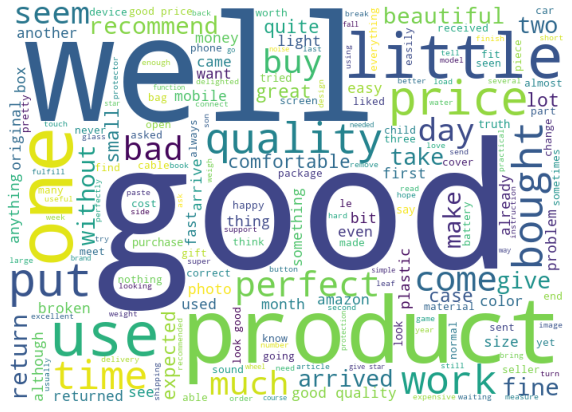

In [30]:
def wordcloud(data, column):
    df_ = data[column].str.cat(sep = ' ')
    text = ' '.join([word for word in df_.split()])
    
    wordcloud = WordCloud(width = 700, height = 500, background_color = 'white').generate(text)
    
    plt.figure(figsize = (10,15))
    plt.imshow(wordcloud)
    plt.axis('off')

wordcloud(df, 'cleaed_translated_review')

Wordcloud provides a broad comprehension of the dataset's sentiment. Conversely, the term with the lowest frequency will have the highest font. The word with the highest frequency will also have the largest font.

# Keyphrase Extraction

In [31]:
df.head(2)

,cleaed_translated_review
0,meet requirement walk
1,not see reliable not give two measure guide re...


In [32]:
def yake_extractor(data):
    yake_kp_extractor = yake.KeywordExtractor()
    keywords = yake_kp_extractor.extract_keywords(data)
    keyword_list = []
    
    for kw in keywords:
        keyword_list.append(kw[0])
    return keyword_list

keywords = df['cleaed_translated_review'].apply(yake_extractor)


final_keywords = []

for kw_ in keywords:
    final_keywords.extend(kw_)

count_keywords = Counter(final_keywords).most_common(25)
count_keywords

[('good', 152),
 ('quality', 73),
 ('product', 58),
 ('price', 51),
 ('perfect', 48),
 ('work', 45),
 ('arrived', 35),
 ('put', 33),
 ('bought', 33),
 ('good quality', 32),
 ('time', 32),
 ('day', 31),
 ('bad', 31),
 ('beautiful', 30),
 ('buy', 30),
 ('fine', 30),
 ('recommend', 29),
 ('expected', 29),
 ('lot', 27),
 ('comfortable', 25),
 ('small', 25),
 ('fast', 24),
 ('give', 23),
 ('make', 23),
 ('photo', 22)]

The Yet Another Keyword Extractor (Yake) is an unsupervised automatic keyword extraction technique that uses text statistical features that are retrieved from individual documents to choose the most crucial keywords in a text. frequently used to extract important information from a collection of sentences or documents.

# Spliting the Features and Labels

In [33]:
X = df['cleaed_translated_review']

print('X shape: ',X.shape)

X shape:  (1000,)


# Feature Engineering

## CountVectorizer

In [34]:
count_vector = CountVectorizer()
count_vector.fit(X)
X_countvectorizer = count_vector.transform(X).A

print('X CountVectorizer shape: ',X_countvectorizer.shape)

X CountVectorizer shape:  (1000, 2596)


Another name for "CountVectorizer" is Bag Of Words (BOW).
Tokenization with the "CountVectorizer" (Tokenization is the process of breaking a sentence into words by performing preprocessing operations like changing all words to lowercase, removing special characters, etc.)

As a consequence, an encoding vector is returned that contains the length of the full vocabulary as well as an integer count for how many times each word appears in the sentence (all words).

In [35]:
pd.DataFrame(X_countvectorizer, columns = count_vector.get_feature_names_out())

,able,ableall,abolished,abrupt,absence,absent,absolutely,absorb,absorbent,absorbs,...,yellowish,yes,yesterday,yet,young,youtube,zero,zip,zipper,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF

In [36]:
tfidf = TfidfVectorizer()
tfidf.fit(X)

X_tfidf = tfidf.transform(X).A

print('X TF-IDF shape: ',X_tfidf.shape)


X TF-IDF shape:  (1000, 2596)


TF-IDF stands for term frequency-inverse document frequency.

TF >> The way term frequency works is by examining how frequently a specific phrase is used in relation to the document. There are various frequency definitions or metrics, including:

occurrences of the word in a document (raw count).
Adjusted for document length, term frequency (raw count of occurences divided by number of words in the document).

The inverse document frequency (IDF) method examines how frequently (or infrequently) a word appears in the corpus. IDF is calculated as follows, where N is the number of documents (d) in the corpus and t is the term (word) we are attempting to gauge the commonness of (D).. The number of documents that contain the phrase "t" serves as the denominator.

In [37]:
pd.DataFrame(X_tfidf, columns = tfidf.get_feature_names_out())

,able,ableall,abolished,abrupt,absence,absent,absolutely,absorb,absorbent,absorbs,...,yellowish,yes,yesterday,yet,young,youtube,zero,zip,zipper,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Word2Vec Customized

In [38]:
sentence = df['cleaed_translated_review'].tolist()
splited_sent = [sent.split() for sent in sentence]
print(splited_sent)

[['meet', 'requirement', 'walk'], ['not', 'see', 'reliable', 'not', 'give', 'two', 'measure', 'guide', 'reliable', 'measure', 'not', 'see', 'good'], ['incredible', 'aroma', 'enjoy'], ['okay', 'normal', 'spend', 'afternoon', 'fulfills', 'function', 'well'], ['many', 'problem', 'match', 'bracelet', 'mobile', 'app', 'finally', 'seems', 'achieved', 'recognizes', 'lot', 'variety', 'activity', 'measure', 'sleep', 'step', 'heart', 'rate'], ['image', 'quite', 'decent', 'room', 'dark', 'not', 'much', 'returned', 'not', 'connected', 'wirelessly', 'io'], ['comply', 'clean', 'good', 'thing', 'not', 'need', 'use', 'inconvenience', 'fact', 'right'], ['good', 'quality', 'case', 'simple', 'price', 'bought', 'play', 'school', 'son', 'liked', 'lot'], ['son', 'beautiful', 'second', 'day', 'rained', 'drop', 'one', 'entered', 'not', 'give', 'many', 'hour', 'direct', 'sun', 'not', 'illuminate', 'sufficiently'], ['buy', 'mobile', 'december', 'year', 'august', 'good', 'firsthe', 'still', 'guarantee', 'not', '

The ability of Word2Vec to assemble vectors of related words gives it its effectiveness. Word2Vec can provide accurate predictions about a word's meaning based on its usage in the text when given a sizable enough dataset. With other words in the corpus, these estimations produce word associations.

Word2Vec need data in list of words of each document. Hence we convert attribute into list using .tolist(). And then we split the each sentense.

In [39]:
word2vec_model = Word2Vec(splited_sent, min_count = 2, window = 3)

Unfortunately, when I train and create the word2vec model, I only take a small number of "batch words" into account. So, it is issuing a caution. To forecast the target word, I used the input "splited sent" with a window size of 3 and instructed it to take into account the "min count" of word 2.

In [40]:
word2vec_model.save('word2vec.model')

In [41]:
def vectorizer(list_of_docs, model):
    features = [] #numerical format of document
    for review in list_of_docs:
        vectors = []
        zero_vectors = np.zeros(model.vector_size)
        for word in review:
            if word in model.wv:
                try:
                    vectors.append(model.wv[word])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            average_vectors = vectors.mean(axis = 0)
            features.append(average_vectors)
        else:
            features.append(zero_vectors)
    return features

Here, we vectorize words with a len of 100 for each word. Here, we are utilizing the "First For loop" to go over each review. Additionally, zero vectors are constructed for words for which no word vectors are created. If we do not assign a zero vector to that word, we will encounter an error and our program will terminate.

Using a "second For loop," we are currently iterating over each word of each review. If a word already exists in the "customized word2vec model," an attempt will be made to add it to the "vector list."

If a vector is provided, an array with all vectors in it will be created. We will now obtain the word2vec of all papers, which is the average word vector across all words found in those texts. Furthermore, document vector will be added to the feature list.

Additionally, there is a chance that some documents' vectors won't be formed; in this case, I attach a zero vector.

In [42]:
X_vectors = vectorizer(splited_sent, word2vec_model)
X_word2vec = np.array(X_vectors)
X_word2vec

array([[-0.00342112, -0.0025301 ,  0.0009358 , ..., -0.00536823,
         0.00229904, -0.00021759],
       [-0.01841666, -0.00744147,  0.0146879 , ..., -0.02483358,
        -0.00185011, -0.0025755 ],
       [-0.00085011,  0.00047285,  0.00238645, ..., -0.00177787,
         0.00332756, -0.00053771],
       ...,
       [ 0.00204079, -0.00468465, -0.00235807, ..., -0.00581934,
         0.00072659,  0.00282298],
       [-0.00958491, -0.0037446 ,  0.0056354 , ..., -0.01257135,
        -0.00080844, -0.00115409],
       [-0.01782652, -0.00842025,  0.0121048 , ..., -0.01927406,
        -0.00362492, -0.00268671]])

By using np.array(X_vector) we combine vectors of all the documents for our model training

# Model Training & Evaluation 

# Identifying the Number of Cluster

### Elbow Methods

In [43]:
k_list = []
elbow_score = []

for k in range(1,10):
  k_list.append(k)
  model = KMeans(n_clusters = k)
  model.fit(X_word2vec)
  elbow_score.append(model.inertia_)

Here, we first decided on K as the number of clusters we wanted to include in our dataset.
The centroid of each cluster is then created at random using k feature vectors. Then, place each data point on its closest centroid. Then, by calculating the means of each and every data point inside the same cluster, we recalculate the centroid of the cluster. We keep doing this until the intertia convergence/intertia changes stop. Our needed number of clusters for this dataset is where we reach convergence.

In [44]:
figure = go.Figure(data = go.Scatter(x = k_list, y = elbow_score))
figure.show()

I could see the inertia at three here. Following that, the model provides almost constant interia.
So I've decided to use 3 clusters for my data.

In [45]:
def kmeans_model(cluster_size, data):
    model = KMeans(n_clusters = cluster_size)
    model.fit(data)
    y_predict = model.predict(data)
    return model, y_predict

Here, We define the function for model training and will apply all the data (BoW, TFIDF, and Word2Vec data). Here, I train the model using training data.

In [46]:
kmeans_countvectorizer, y_predict_countvectorizer = kmeans_model(3, X_countvectorizer)

In [47]:
pd.unique(kmeans_countvectorizer.labels_)

array([0, 2, 1], dtype=int32)

As we want to get 3 classes like (positive, negative, neutral). Hence we n_cluster = 3 and pass respective data.

In [48]:
y_predict_countvectorizer

array([0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [49]:
kmeans_tfidf, y_predict_tfidf = kmeans_model(3, X_tfidf)

In [50]:
pd.unique(kmeans_tfidf.labels_)

array([0, 2, 1], dtype=int32)

In [51]:
y_predict_tfidf

array([0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2,
       1, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 0, 2, 0,
       1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 0,
       2, 2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1, 1, 2, 0, 2,
       0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1,
       0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 0,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,

In [52]:
kmeans_model_word2vec, y_predict_word2vec = kmeans_model(3, X_word2vec)

In [53]:
y_predict_word2vec

array([0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 2,
       0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1,
       0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1,
       0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0,
       0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1,

In [54]:
print(kmeans_model_word2vec.inertia_)

0.5673389356810756


kmeans_model_word2vec.interia_ >> gives us the interia of model. Value of Interia should be low as all the datapoints are nearer to each other. means distance between datapoint and centroid is low.
Sum of square of distances between every datapoints to centroid.

In [55]:
print(kmeans_model_word2vec.labels_)

[0 2 0 0 0 1 1 1 1 1 1 0 2 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 2 0 1 1 2 1 1 2
 1 0 0 1 0 2 0 1 0 2 1 1 2 1 1 0 1 2 1 1 1 2 2 0 1 2 0 0 0 0 2 0 1 0 0 1 2
 0 0 2 2 0 1 2 1 0 2 1 0 2 1 0 1 0 0 2 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1
 0 0 1 0 1 0 2 1 1 1 1 1 1 1 2 1 1 0 1 0 0 2 2 1 1 0 0 1 1 1 0 2 1 1 1 2 0
 2 1 1 2 0 2 0 0 0 2 1 0 1 0 2 1 0 0 0 1 0 0 1 1 2 2 1 1 0 1 1 0 0 2 0 0 0
 0 1 0 1 1 0 1 2 1 0 1 1 1 0 1 0 0 0 1 1 0 0 2 0 0 1 0 1 0 0 1 1 1 0 1 1 0
 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 2 1 0 1 2 2 0 0 0 1 2 0 0 2 0 1 1 0 0
 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 2 0 1 1 0 0 1 1 1 1 2 0 0 1 1 0 2 0 0 0 0 1
 2 2 0 0 1 2 0 1 0 1 1 0 1 1 2 1 2 1 1 1 1 2 0 1 0 1 1 1 1 0 0 1 1 1 0 0 2
 2 0 1 1 1 1 1 0 2 1 2 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 2 1 0 1 1 0 1 0 2 1
 0 2 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 2 1 0 1 1 1 1 0 1 0 1 1 2 1 1
 2 1 2 0 0 0 0 0 1 0 2 0 1 1 1 1 0 2 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0
 1 1 1 1 0 0 1 1 1 0 2 0 1 0 1 1 1 1 1 2 2 1 0 2 1 2 0 2 0 2 0 0 2 1 1 1 2
 0 2 1 1 1 2 1 1 0 1 0 0 

In [56]:
pd.unique(kmeans_model_word2vec.labels_)

array([0, 2, 1], dtype=int32)

kmeans_model_word2vec.labels_ >> gives us the label of different datapoints after model building. 

In [57]:
print(kmeans_model_word2vec.cluster_centers_)

[[-7.29033888e-03 -3.05101728e-03  5.36454687e-03  3.41945110e-03
   2.81991258e-03  4.51480592e-03 -5.00012524e-03  5.27085774e-03
  -1.31389793e-02 -8.64597678e-04  4.68183475e-03 -1.37210904e-02
   1.97277116e-05  9.02699998e-03 -6.90257008e-03 -3.25240276e-03
   1.22167266e-03 -1.30134146e-02 -2.56967091e-03 -8.16958335e-03
   3.62551876e-03  4.16269512e-03  7.36893793e-04 -1.11210868e-02
   3.89464001e-03  3.92656438e-03  3.53264656e-03 -1.05840261e-02
  -3.79792539e-03  5.64274297e-03 -3.92111251e-03  9.21162306e-03
   3.11500252e-03 -2.95544372e-03  1.04046157e-02 -6.99817752e-03
   3.47212342e-03 -5.74383403e-03 -5.04370132e-03  1.16493057e-02
   3.66112656e-03  1.59800075e-02 -8.41113026e-03 -3.62670285e-03
   5.27110169e-04 -9.65745940e-03 -1.02482500e-02 -1.64529930e-03
   2.65360742e-03  1.41086064e-04  1.64672788e-03 -3.66917898e-03
   1.15220529e-04 -6.77878133e-04 -1.02518415e-02  4.32549263e-03
  -1.67567866e-02 -2.00554260e-03  7.11185485e-03  3.09231727e-03
   8.25338

kmeans_model_word2vec.cluster_centers_ >> gives centroid of the cluster.

In [58]:
df['cluster_id'] = kmeans_model_word2vec.labels_
df.head()

,cleaed_translated_review,cluster_id
0,meet requirement walk,0
1,not see reliable not give two measure guide re...,2
2,incredible aroma enjoy,0
3,okay normal spend afternoon fulfills function ...,0
4,many problem match bracelet mobile app finally...,0


# Model Evaluation

In [59]:
print(f'Silhouette Score with KMeans-CountVectorizer: {silhouette_score(X_countvectorizer, y_predict_countvectorizer)}')      
      
print(f'Silhouette Score with KMeans-TFIDF: {silhouette_score(X_tfidf, y_predict_tfidf)}')

print(f'Silhouette Score with KMeans-Word2Vec: {silhouette_score(X_word2vec, y_predict_word2vec)}')

Silhouette Score with KMeans-CountVectorizer: 0.1813863889450481
Silhouette Score with KMeans-TFIDF: 0.0067174242751745815
Silhouette Score with KMeans-Word2Vec: 0.4259521047245555


The silhouette score enables us to assess the accuracy of the cluster. If the Silhouette score is close to 1, the algorithm has properly predicted the mood of the recorded data.

As can be seen, Word2Vec provided the highest Silhouette score, 0.42.

Silhouette Score >> Allows us to use K-Selection. 
(b-a)/max(a,b)

a >> mean distance of single datapoint to other datapoints in the same cluster

b >> mean nearest-cluster distance, the mean of all datapoint of single single cluster to mean of all other datapoints in the closest cluster.

Silhouette Score should be close to 1. 

Silhouette Score == 1 >> means datapoint is far away from the next cluster. And that datapoint is very close to datapoints of the same cluster. Means Datapoint is well inside its own cluster and far away from other cluster.

Silhouette Score == -1 >> means datapoint is far away from the its own cluster. And that datapoint is very close to next cluster. Means Datapoint is assigned to diffrent/wrong cluster.

Silhouette Score == 0 >> Our datapoint is close to a cluster boundary.

In [60]:
def visulize_silhouette(data,model,title1):
    visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(data)
    plt.title(f'Sihouette visualizer for {title1}')

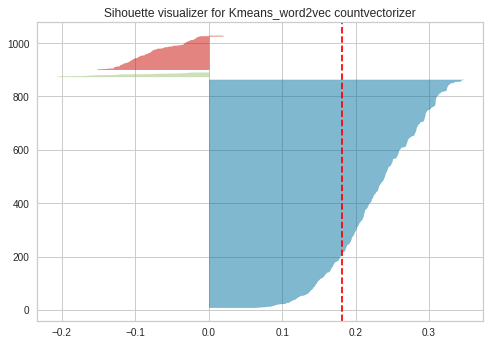

In [61]:
visulize_silhouette(X_countvectorizer, kmeans_countvectorizer,'Kmeans_word2vec countvectorizer')

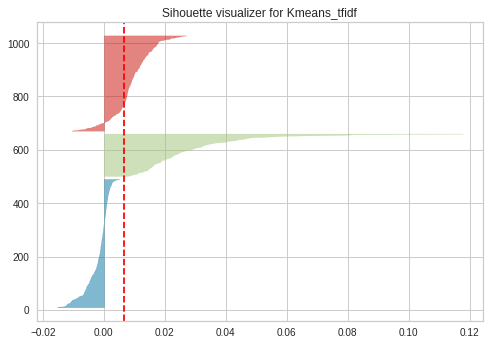

In [62]:
visulize_silhouette(X_tfidf, kmeans_tfidf,'Kmeans_tfidf')

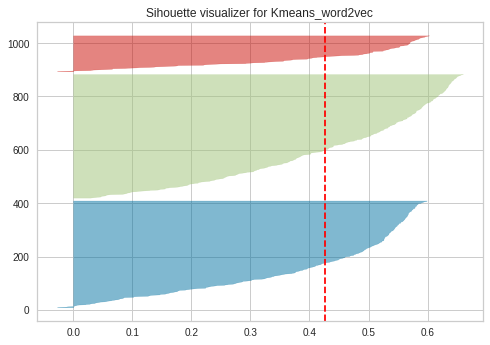

In [63]:
visulize_silhouette(X_word2vec, kmeans_model_word2vec,'Kmeans_word2vec')

Here, we first pass the data from (BoW/TF-IDF/word2vec), followed by the appropriate model and the "Title of the Graph".

As can be seen, a good silhouette graph was produced using word2vec data and the kmeans model word2vec. And each data point's perfect class is being created. Here, the red dashed line denotes the average silhouette.

We can see that using the word2vec data enabled us to produce tidy clusters.

silhouette score considered as a Evaluation Matrix for this assessment as we didn't have any labels.
Hence we considered silhouette score for evaluting clustering model.

We know that, silhouette score range is from -1 to +1. Here i got silhouette score 0.43, As this is not the best score as my dataset is not informative to group the reviews together.

# Conclusion

Here we got the raw data without labels. Our Task to do the sentiment analysis. We have to understand whether review is positive/negative/neutral. Hence we perform clustering. and we create a label for our records.


***Strength***:

Here we use K_Means Algorithm. And we know that, 
K-Means is fast, scalable, and it converge to a solution at the end.

Listed below are some of our pipeline's key Strengths.

Here Our data was Multilingual data.  So we performed below stpes: 

**Initial preprocessing** 

language detection >> We detect the language of the each record from our dataset.
 
language translation >> Later language detection, We translate multilingual dataset into single language for better data processing, clustering prediction.

Then we performed EDA like

**EDA**

N_gram >> unigram, bigrams, trigrams 

n_gram used to understand the domain specific stopwords. We understand what are the most comman words and reviews are present in the dataset. 

keyphrase extraction: The process of extracting significant words from a document that are pertinent.

wordcloud: The magnitude of each word in a text representation is indicated by its frequency or relevance using the data visualization approach of word clouds. Word clouds are useful for emphasizing important textual data points. Frequently, data from e-commerce websites is analyzed using word clouds. 


**Data Pre-processing** >>

removed spaces, newline, blanklines

contraction mapping to expand word the words like doesn't, can't into does not, cannot etc.

removed punctuations like colons and semi-colons, question marks, quotation marks, exclamation marks, and commas

removed stopwords >> We removed commonly used stopword like 'in', 'the', 'a', 'an' etc.

removed language specific word >> Also, domain related stopwords which are not necessary.

if len(word)<2 thenw we removed >> As we anticipated, words less than two letters do not make sense for tasks requiring emotive analysis.

handled accented characters >> we convert accented characters  à, è, ì, ò, ù, À, È, Ì, Ò, Ù into proper alphabets like (a,e,i,o,u)

normalization of data >> we normalize the data. Convert all sentence case, uppar case, lower case, and capital of each word letter into lower case. To bring every character into same characters.

tokenization (word_tokenizer, sent_tokenizer). We performed word_tokenizer. As Documents should be broken down into words that are easy to understand in order to divide paragraphs and phrases into smaller pieces that can be more easily ascribed meaning.

stemming / lemmetization >> Lemmatization makes use of the word's context, whereas stemming makes use of the word's stem. To our preference Lemmatization because context analysis is advised when the context is not significant, in contrast to stemming.

then we got the cleaned data.

Since we do not have 'label' then will go for clustering.


**Feature Engineering** >>

BoW (Bag of words)/ CountVectorizer >> Simply counting the number of times a word appears in a document is what CountVectorizer does (using a Bag of words approach)

TFIDF >> The TF-IDF Vectorizer considers a word's importance to the entire corpus in addition to how frequently it appears in a document.

Word2Vec >> Word2Vec's capacity to compile word vectors into groups of comparable words gives it its name. Word2Vec can infer a word's meaning with reasonable accuracy based on its usage in the text if the dataset is large enough. Through these estimates, word associations with other words in the corpus are produced. It tries to get the word vector.


**Model Training**

We trained the model with following combination: 

k-Means- BoW (Bag of words)/ CountVectorizer

k-Means- TFIDF

k-Means- Word2Vec


**Model Evaluation**

Then we check the Silhouette score with each combination.

Silhouette score

Silhouette Visualization

The separation distance between the generated clusters can be investigated using silhouette analysis. The silhouette plot offers a visual approach to evaluate variables like the number of clusters by displaying a measure of how close each point in one cluster is to points in the neighboring clusters.

***Weakness***

Here, Finding a K value is challenging task.

As Here our model got converge to some solution, but it is not sure that this converge is the right solution.

As there are no label data to validate our cluster like supervised learning.

We cannot perform any Hyperparameter tunning like gridsearch, randomsearch.

Although we have Silhouette score to check the correctness of cluster but it is not that accurate.

Due to the fact that our data is multilingual, language translation operations are carried out. For some sentences, it may occasionally modify the meaning of the sentence.


**Recommendation**:

The data will be combined with the expected classes in the future. Afterward, carry out the supervised machine learning activity and determine the classes for the remaining records.

## References: 

Github: https://github.com/paragj30/

Dataset: https://drive.google.com/file/d/1De6OWy7U5Yb2joTX9yrra3sa67fTCZrr/view?usp=share_link

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

Yake: https://libraries.io/search?keywords=yake

word2vec: https://www.tensorflow.org/tutorials/text/word2vec

Data Preprocessing: https://pypi.org/project/